In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
import time
import sys

base_dir = '.'
Y2015 = pd.read_csv(base_dir + '/2015.csv', encoding = "ISO-8859-1")
Y2016 = pd.read_csv(base_dir + '/2016.csv', encoding = "ISO-8859-1")

In [3]:
Y2015.head()

,uid,name,age,gender,raceethnicity,armed,month,day,year,streetaddress,city,state,classification,lawenforcementagency
0,2,Matthew Ajibade,22,Male,Black,No,January,1,2015,1050 Carl Griffin Dr,Savannah,GA,Death in custody,Chatham County Sheriff's Office
1,4,Lewis Lembke,47,Male,White,Firearm,January,2,2015,4505 SW Masters Loop,Aloha,OR,Gunshot,Washington County Sheriff's Office
2,5,Michael Kocher Jr,19,Male,White,No,January,3,2015,2600 Kaumualii Hwy,Kaumakani,HI,Struck by vehicle,Kauai Police Department
3,6,John Quintero,23,Male,Hispanic/Latino,No,January,3,2015,500 North Oliver Ave,Wichita,KS,Gunshot,Wichita Police Department
4,7,Tim Elliott,53,Male,Asian/Pacific Islander,Firearm,January,2,2015,600 E Island Lake Dr,Shelton,WA,Gunshot,Mason County Sheriff's Office


**The first thing we'll do is do some basic descriptions of our data.**  

I will start with looking at the number of fatalities by month for each year


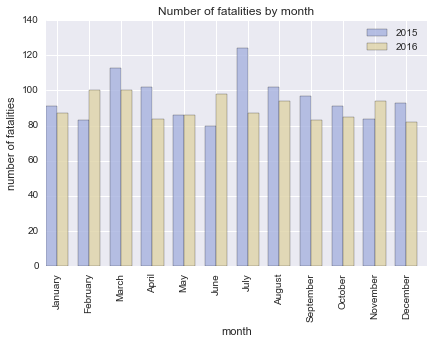

In [291]:
Y2015_bymonth = Y2015.month.value_counts(sort = False)
Y2016_bymonth = Y2016.month.value_counts(sort = False)
#s = s.reindex(index = ['B','A','C'])
new_index = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
Y2015_bymonth = Y2015_bymonth.reindex(index = new_index)
Y2016_bymonth = Y2016_bymonth.reindex(index = new_index)

ind = np.arange(12)
opacity = 0.8
bar_width = 0.35

fig = plt.figure()
plt.bar(ind, Y2015_bymonth, bar_width,
                 alpha=opacity,
                 color='#a7b2df',
                 label='2015')
plt.bar(ind+bar_width, Y2016_bymonth, bar_width,
                 alpha=opacity,
                 color='#dfd4a7',
                 label='2016')
plt.tight_layout()
plt.xticks(ind + bar_width,new_index, rotation = 'vertical')
plt.xlabel('month')
plt.ylabel('number of fatalities')
plt.title('Number of fatalities by month')
plt.legend()

Let's now break down by race

In [45]:
def convert_to_series(df):
    s1 = df.set_index(df.state.values)
    s1= s1.drop(['state'], axis = 1)

    return s1
    
def bar_for_variable(Y2015, Y2016, var, **kwargs):
    
    if 'counts' not in kwargs:
        Y2015_byvar = Y2015[var].value_counts(sort = True)
        Y2016_byvar = Y2016[var].value_counts(sort = True)

    else:
        Y2015_byvar = Y2015.sort_values(ascending = False)
        Y2016_byvar = Y2016.sort_values(ascending = False)
    
    
    if 'Y2016_sort' in kwargs: 
        new_index = Y2016_byvar.index.get_values()
    else:
        new_index = Y2015_byvar.index.get_values()
    
    Y2015_byvar = Y2015_byvar.reindex(index = new_index)
    Y2016_byvar = Y2016_byvar.reindex(index = new_index)
    Y2016_byvar = Y2016_byvar.fillna(0)

    if 'trunc' in kwargs:
        Y2015_byvar = Y2015_byvar[:kwargs['trunc']]
        Y2016_byvar = Y2016_byvar[:kwargs['trunc']]
        
    ind = np.arange(len(Y2016_byvar))
    opacity = 0.7
    bar_width = 0.35
    


    fig = plt.figure()
    plt.bar(ind, Y2015_byvar, bar_width,
                 alpha=opacity,
                 color='#800000',
                 label='2015')
    plt.bar(ind+bar_width, Y2016_byvar, bar_width,
                 alpha=opacity,
                 color='#d1c282',
                 label='2016')

    plt.tight_layout()
    plt.xticks(ind + bar_width,new_index, rotation = 'vertical')
    
    if 'xlab' in kwargs:
        plt.xlabel(kwargs['xlab'])
    if 'ylab' in kwargs:
        plt.ylabel(kwargs['ylab'])
    
    if 'title' in kwargs:
        plt.title(kwargs['title'])
    plt.legend()

    return Y2015_byvar, Y2016_byvar, new_index[ind]


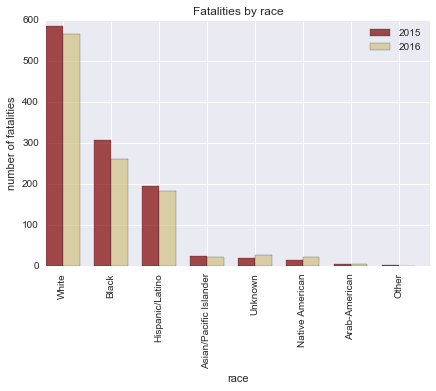

In [293]:
Y2015_byrace, Y2016_byrace, ni_race = bar_for_variable(Y2015, Y2016, 'raceethnicity', title = 'Fatalities by race', xlab = 'race', ylab = 'number of fatalities')

Now by state

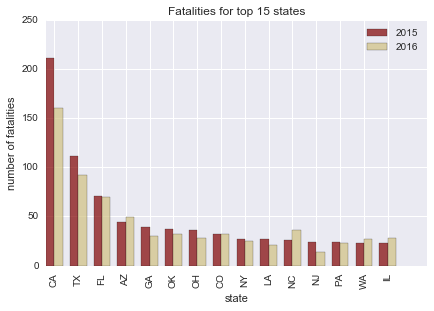

In [294]:
Y2015_s, Y2016_s, ind_s = bar_for_variable(Y2015, Y2016, 'state', trunc = 15, title = 'Fatalities for top 15 states', xlab = 'state', ylab = 'number of fatalities')

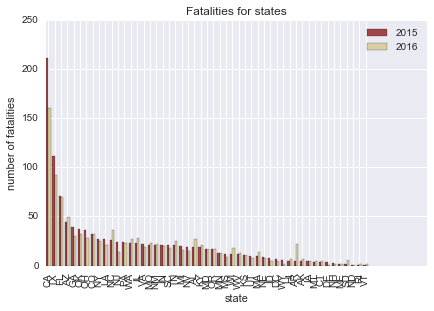

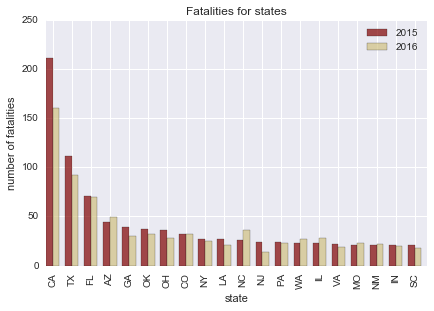

In [295]:
Y2015_s, Y2016_s, ind_s = bar_for_variable(Y2015, Y2016, 'state',title = 'Fatalities for states', xlab = 'state', ylab = 'number of fatalities')
Y2015_s, Y2016_s, ind_s = bar_for_variable(Y2015, Y2016, 'state',title = 'Fatalities for states', trunc = 20, xlab = 'state', ylab = 'number of fatalities')
pop_2015 = pd.read_csv('state_pop_2015.csv', index_col=0)


In [296]:
rel_pop = pop_2015[pop_2015.state.isin(ind_s)]
rel_pop = rel_pop.set_index(rel_pop.state.values)
rel_pop = rel_pop.drop(['state'], axis = 1)


In [297]:
Y2015_srel = Y2015_s.divide(rel_pop['pop'])
Y2016_srel = Y2016_s.divide(rel_pop['pop'])


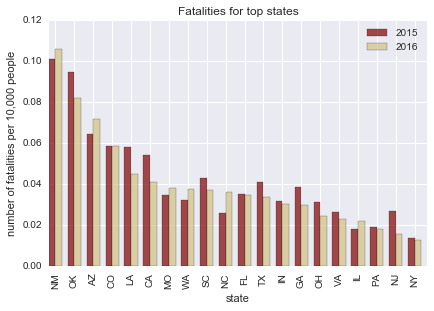

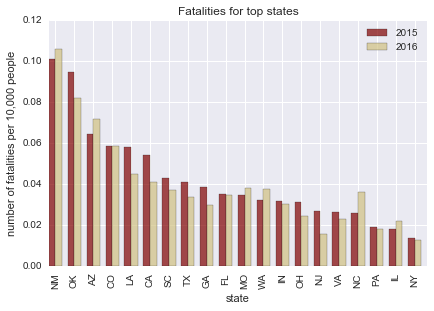

In [298]:
re = bar_for_variable(Y2015_srel*10000, Y2016_srel*10000, 'state',counts= 0, trunc = 20, title = 'Fatalities for top states', xlab = 'state', ylab = 'number of fatalities per 10,000 people', Y2016_sort = True)

re = bar_for_variable(Y2015_srel*10000, Y2016_srel*10000, 'state',counts= 0, trunc = 20, title = 'Fatalities for top states', xlab = 'state', ylab = 'number of fatalities per 10,000 people')



In [299]:
def alt_describe(values):
    print 'Mean: ', np.mean(values)
    print 'Std: ', np.std(values)
    print 'Median: ', np.median(values)

In [300]:
alt_describe(10000*Y2015_srel.values)
print ' '
alt_describe(10000*Y2016_srel.values)

Mean:  0.0422742952038
Std:  0.0229093211793
Median:  0.0347717810159
 
Mean:  0.0397006704921
Std:  0.0228615470854
Median:  0.0351890981698


#### Is there a clearer pattern for time of year if I select a place with harsher winters?

In [301]:
def month_by_region(Y2015, Y2016, **kwargs):
    
    if 'city' in kwargs:
        city = kwargs['city']
        Y2015city = Y2015[Y2015.city == city]
        Y2016city = Y2016[Y2016.city == city]
    elif 'state' in kwargs:
        city = kwargs['state']
        Y2015city = Y2015[Y2015.state == city]
        Y2016city = Y2016[Y2016.state == city]
    
    
    Y2015_bymonth = Y2015city.month.value_counts(sort = False)
    Y2016_bymonth = Y2016city.month.value_counts(sort = False)
    #s = s.reindex(index = ['B','A','C'])
    new_index = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    Y2015_bymonth = Y2015_bymonth.reindex(index = new_index)
    Y2016_bymonth = Y2016_bymonth.reindex(index = new_index)

    ind = np.arange(12)
    opacity = 0.8
    bar_width = 0.35

    fig = plt.figure()
    plt.bar(ind, Y2015_bymonth, bar_width,
             alpha=opacity,
             color='#800000',
             label='2015')
    plt.bar(ind+bar_width, Y2016_bymonth, bar_width,
             alpha=opacity,
             color='#d1c282',
             label='2016')
    plt.tight_layout()
    plt.xticks(ind + bar_width,new_index, rotation = 'vertical')
    plt.xlabel('month')
    plt.ylabel('number of fatalities')
    plt.title('Number of fatalities by month')
    
    plt.legend()

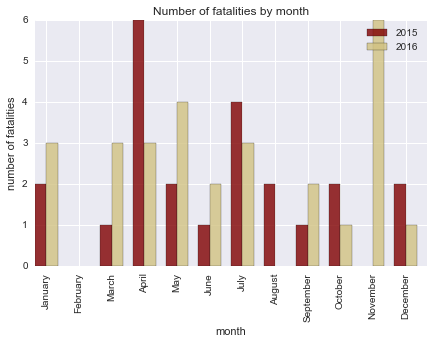

In [302]:
month_by_region(Y2015, Y2016,state = 'IL')

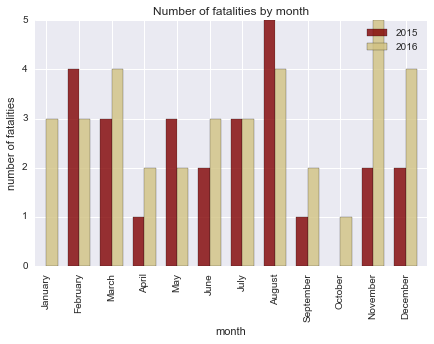

In [303]:
month_by_region(Y2015, Y2016,state = 'NC')

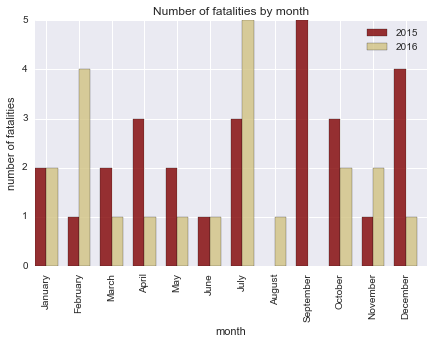

In [304]:
month_by_region(Y2015, Y2016,state = 'LA')

In [56]:
def count_unarmed(Y2015): 
    armed_2015 = Y2015[(Y2015.armed != 'No')].raceethnicity.value_counts()
    notarmed_2015 = Y2015[Y2015.armed == 'No'].raceethnicity.value_counts()
    percentage_notarmed = notarmed_2015.divide((notarmed_2015 + armed_2015))
    percentage_notarmed.sort_values(inplace = True)
    return percentage_notarmed

In [57]:
p_na2015 = count_unarmed(Y2015)
p_na2016 = count_unarmed(Y2016)

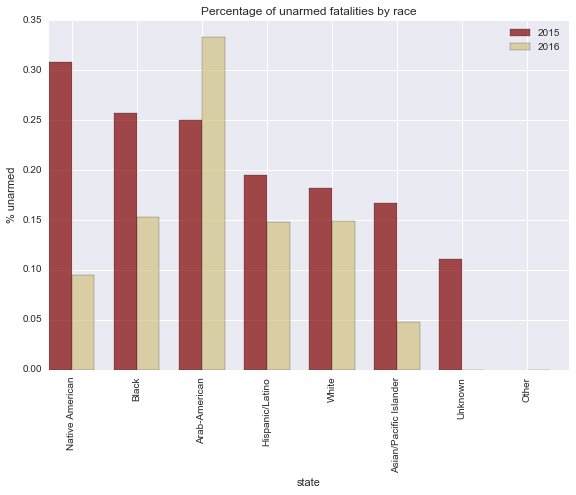

In [59]:
re = bar_for_variable(p_na2015, p_na2016, 'state',counts= 0, trunc = 20, title = 'Percentage of unarmed fatalities by race', xlab = 'state', ylab = '% unarmed')